Hasil yang Diharapkan
- Laporan lengkap tentang produk-produk yang paling laku dan analisis tren penjualan.
- Profil pelanggan yang paling sering membeli produk.
- Daftar produk dengan margin keuntungan tertinggi.


Tujuan Analisis
- Mengidentifikasi produk elektronik yang paling laku.
- Menganalisis tren penjualan bulanan dan musiman.
- Mengetahui profil pelanggan yang paling sering membeli.
- Mengidentifikasi produk dengan margin keuntungan tertinggi.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

# Generating Sales dataset with 500 rows
order_ids = np.arange(1, 501)
product_ids = np.random.choice([101, 102, 103, 104, 105], size=500)
customer_ids = np.random.choice(np.arange(1001, 1051), size=500)
order_dates = pd.date_range(start='2023-01-01', periods=500, freq='D').strftime('%Y-%m-%d').tolist()
quantities = np.random.randint(1, 5, size=500)
prices = np.random.choice([500, 300, 700, 400, 600], size=500)
discounts = np.random.uniform(0, 0.3, size=500).round(2)
salespersons = np.random.choice(['Salesperson_A', 'Salesperson_B', 'Salesperson_C', 'Salesperson_D',
                                 'Salesperson_E', 'Salesperson_F', 'Salesperson_G', 'Salesperson_H',
                                 'Salesperson_I', 'Salesperson_J'], size=500)

# Creating DataFrame
sales_data_larger = {
    'Order_ID': order_ids,
    'Product_ID': product_ids,
    'Customer_ID': customer_ids,
    'Order_Date': order_dates,
    'Quantity': quantities,
    'Price': prices,
    'Discount': discounts,
    'Salesperson': salespersons
}
sales_df_larger = pd.DataFrame(sales_data_larger)

# Mapping product IDs to product names
product_mapping = {
    101: 'Laptop',
    102: 'Smartphone',
    103: 'Television',
    104: 'Tablet',
    105: 'Smartwatch'
}
sales_df_larger['Product_Name'] = sales_df_larger['Product_ID'].map(product_mapping)

# Creating the Products dataset with cost
products_data_larger = {
    'Product_ID': [101, 102, 103, 104, 105],
    'Product_Name': ['Laptop', 'Smartphone', 'Television', 'Tablet', 'Smartwatch'],
    'Category': ['Computers', 'Mobiles', 'Electronics', 'Mobiles', 'Wearables'],
    'Cost': [400, 250, 600, 350, 200],
    'Price': [500, 300, 700, 400, 600]
}
products_df_larger = pd.DataFrame(products_data_larger)

# Creating the Customers dataset
customers_data_larger = {
    'Customer_ID': np.arange(1001, 1051),
    'Customer_Name': [f'Customer_{i}' for i in range(1, 51)],
    'Gender': np.random.choice(['F', 'M'], size=50),
    'Age': np.random.randint(18, 65, size=50),
    'Location': np.random.choice(['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix'], size=50)
}
customers_df_larger = pd.DataFrame(customers_data_larger)

# Saving the larger datasets to an Excel file
with pd.ExcelWriter('data_Penjualan.xlsx') as writer:
    sales_df_larger.to_excel(writer, sheet_name='Sales', index=False)
    products_df_larger.to_excel(writer, sheet_name='Products', index=False)
    customers_df_larger.to_excel(writer, sheet_name='Customers', index=False)


In [ ]:
# Simpan ke dalam file CSV
products_csv_file = 'products_data.csv'
customers_csv_file = 'customers_data.csv'
sales_csv_file = 'sales_data.csv'

products_df_larger.to_csv(products_csv_file, index=False)
customers_df_larger.to_csv(customers_csv_file, index=False)
sales_df_larger.to_csv(sales_csv_file, index=False)


In [ ]:
file_path = 'data_Penjualan.xlsx'
df = pd.read_excel(file_path)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order_ID      500 non-null    int64  
 1   Product_ID    500 non-null    int64  
 2   Customer_ID   500 non-null    int64  
 3   Order_Date    500 non-null    object 
 4   Quantity      500 non-null    int64  
 5   Price         500 non-null    int64  
 6   Discount      500 non-null    float64
 7   Salesperson   500 non-null    object 
 8   Product_Name  500 non-null    object 
dtypes: float64(1), int64(5), object(3)
memory usage: 35.3+ KB


Preprocessing

In [ ]:
total_data = len(df)
print(f"Total data (jumlah baris): {total_data}")

Total data (jumlah baris): 500


In [ ]:
# Memeriksa jumlah nilai NaN dalam setiap kolom
print("\nJumlah nilai NaN dalam setiap kolom:")
print(df.isna().sum())

# Menghapus baris yang berisi nilai NaN
data_cleaned = df.dropna()

# Menampilkan beberapa baris pertama dari dataset setelah perubahan
print("\nSetelah menghapus nilai NaN:")
print(data_cleaned.head())


Jumlah nilai NaN dalam setiap kolom:
Order_ID        0
Product_ID      0
Customer_ID     0
Order_Date      0
Quantity        0
Price           0
Discount        0
Salesperson     0
Product_Name    0
dtype: int64

Setelah menghapus nilai NaN:
   Order_ID  Product_ID  Customer_ID  Order_Date  Quantity  Price  Discount  \
0         1         105         1011  2023-01-01         1    300      0.25   
1         2         102         1007  2023-01-02         2    700      0.16   
2         3         103         1040  2023-01-03         1    500      0.14   
3         4         102         1005  2023-01-04         1    400      0.14   
4         5         102         1025  2023-01-05         3    600      0.23   

     Salesperson Product_Name  
0  Salesperson_G   Smartwatch  
1  Salesperson_I   Smartphone  
2  Salesperson_J   Television  
3  Salesperson_B   Smartphone  
4  Salesperson_A   Smartphone  


Analisis data

<ipython-input-17-cf2b728af672>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Quantity', y='Product_Name', data=product_sales, palette='viridis')


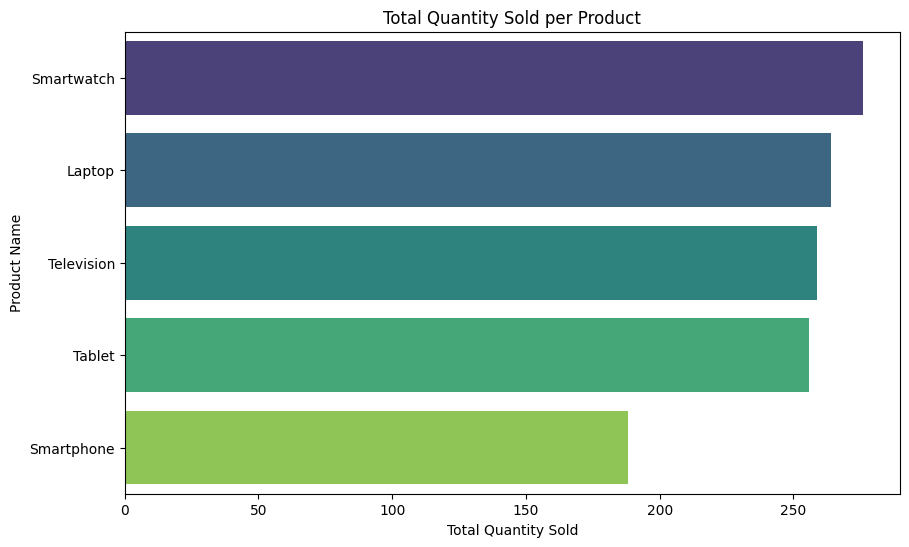

In [ ]:
"""Mengidentifikasi produk elektronik yang paling laku."""

#menghitung setiap produk yang terjual, dengan menghitung berapa kali produk tersebut muncul dengan "sum"
product_sales = sales_df_larger.groupby('Product_Name')['Quantity'].sum().reset_index()

# melakukan pengurutan "sort" untuk mengetahui mana produk yang paling laku
product_sales = product_sales.sort_values(by='Quantity', ascending=False)

# Plotting the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Quantity', y='Product_Name', data=product_sales, palette='viridis')
plt.title('Total Quantity Sold per Product')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Name')
plt.show()

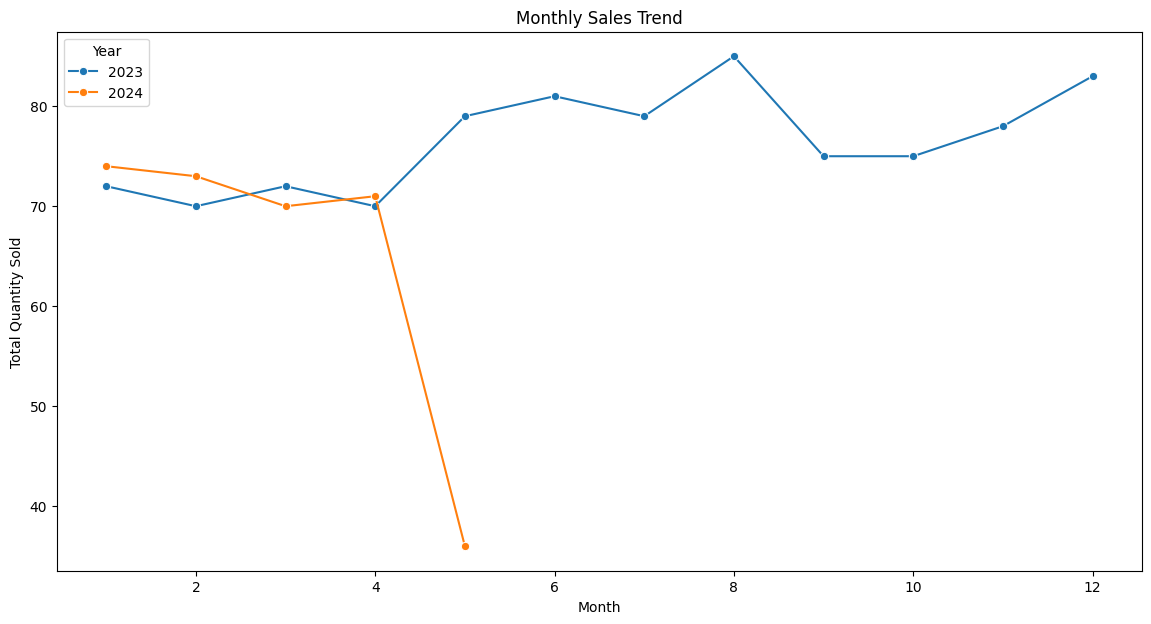

In [ ]:
"""Menganalisis tren penjualan bulanan dan musiman."""

# melakukan Convert column Order_Date to datetime format
sales_df_larger['Order_Date'] = pd.to_datetime(sales_df_larger['Order_Date'])

# melakukan Extract data bulan dan tahun dari column Order_Date
sales_df_larger['Month'] = sales_df_larger['Order_Date'].dt.month
sales_df_larger['Year'] = sales_df_larger['Order_Date'].dt.year

# mengelompokan berdasarkan bulan dan tahun, kemudian mengkalkulasi total penjualan
monthly_sales = sales_df_larger.groupby(['Year', 'Month']).agg({'Quantity': 'sum'}).reset_index()

# membuat plot untuk penjualan perbulan untuk setiap tahun
plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_sales, x='Month', y='Quantity', hue='Year', marker='o', palette='tab10')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')
plt.legend(title='Year')
plt.show()

In [ ]:
"""Mengetahui profil pelanggan yang paling sering membeli."""

# Mengelompokkan data penjualan berdasarkan Customer_ID dan menghitung jumlah pembelian
customer_purchase_counts = sales_df_larger['Customer_ID'].value_counts().reset_index()
customer_purchase_counts.columns = ['Customer_ID', 'Purchase_Count']

# Menggabungkan data penjualan dengan data profil pelanggan
customer_profiles = pd.merge(customer_purchase_counts, customers_df_larger, on='Customer_ID')

# Mengurutkan berdasarkan jumlah pembelian
customer_profiles = customer_profiles.sort_values(by='Purchase_Count', ascending=False)

# Menampilkan profil pelanggan yang paling sering membeli
print(customer_profiles.head(10))

   Customer_ID  Purchase_Count Customer_Name Gender  Age     Location
0         1044              17   Customer_44      M   62      Houston
1         1008              16    Customer_8      M   41  Los Angeles
2         1007              15    Customer_7      F   41     New York
3         1039              15   Customer_39      F   30     New York
4         1025              14   Customer_25      M   22      Phoenix
5         1038              14   Customer_38      F   47      Phoenix
6         1001              14    Customer_1      F   33      Houston
7         1016              14   Customer_16      M   31      Houston
8         1018              13   Customer_18      M   31      Chicago
9         1005              13    Customer_5      M   31     New York


In [ ]:
"""#Mengidentifikasi produk dengan margin keuntungan tertinggi."""

# Membuat DataFrame dari data produk
df = pd.DataFrame(products_data_larger)

# Hitung margin keuntungan
df['Margin_Keuntungan'] = df['Price'] - df['Cost']

# Temukan produk dengan margin keuntungan tertinggi
produk_tertinggi = df.loc[df['Margin_Keuntungan'].idxmax()]

# Tampilkan DataFrame dan produk dengan margin keuntungan tertinggi
print("\nProduk dengan margin keuntungan tertinggi:")
print(produk_tertinggi)


Produk dengan margin keuntungan tertinggi:
Product_ID                  105
Product_Name         Smartwatch
Category              Wearables
Cost                        200
Price                       600
Margin_Keuntungan           400
Name: 4, dtype: object


In [ ]:
""" Daftar Margin untuk setiap produk """

# Membuat DataFrame dari data produk
df = pd.DataFrame(products_data_larger)

# Hitung margin keuntungan
df['Margin_Keuntungan'] = df['Price'] - df['Cost']

# Temukan produk dengan margin keuntungan tertinggi
produk_tertinggi = df.loc[df['Margin_Keuntungan'].idxmax()].copy()

# Tampilkan DataFrame dan rekomendasi
print("Data Produk:")
print(df)

Data Produk:
   Product_ID Product_Name     Category  Cost  Price  Margin_Keuntungan
0         101       Laptop    Computers   400    500                100
1         102   Smartphone      Mobiles   250    300                 50
2         103   Television  Electronics   600    700                100
3         104       Tablet      Mobiles   350    400                 50
4         105   Smartwatch    Wearables   200    600                400


Link Dashboard :
